## Task 1 - Part 1

#### Step 1 − Import the necessary packages

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


#### Step 1.5 − Aux Functions

In [9]:
def dividir_matriz_por_percentagem(matriz, percentagem, seed):
    # Define a seed para a aleatoriedade ser reprodutível
    random.seed(seed)
    
    # Calcula quantas linhas terão na matriz menor
    n_linhas_menor_matriz = int(len(matriz) * percentagem)
    
    # Seleciona aleatoriamente as linhas para a matriz menor
    linhas_selecionadas = random.sample(range(len(matriz)), n_linhas_menor_matriz)
    
    # Cria as matrizes maior e menor
    matriz_menor = [matriz[i] for i in linhas_selecionadas]
    matriz_maior = [matriz[i] for i in range(len(matriz)) if i not in linhas_selecionadas]
    
    return matriz_maior, matriz_menor


#### Step 2 − Load the dataset

In [11]:
# import data:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')

X_train_new, X_val = dividir_matriz_por_percentagem(X_train, 0.2, 1234)
print(len(X_train_new))


160


#### Step 3 − Plot the trainning features and outputs

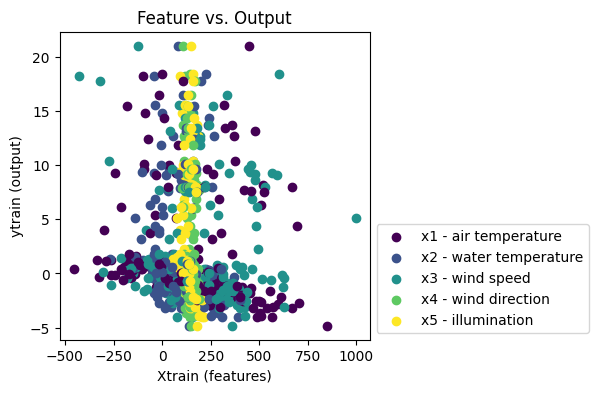

In [25]:
# plot data:

num_colors = 5 # nr_colors = nr_features
gradient = np.linspace(0, 1, num_colors)
colormap = plt.colormaps['viridis']
colors = colormap(gradient)

plt.figure(figsize=(4,4))
plt.title('Feature vs. Output')
plt.xlabel('Xtrain (features)')
plt.ylabel('ytrain (output)')
labels = []

for s,sample in enumerate(X_train):
    for f, feature in enumerate(sample):
        plt.scatter(feature, y_train[s], color= colors[f])

labels.append('x1 - air temperature')
labels.append('x2 - water temperature')
labels.append('x3 - wind speed')
labels.append('x4 - wind direction')
labels.append('x5 - illumination')

plt.legend(labels[:num_colors], loc='lower left', bbox_to_anchor=(1,0))
plt.show()

#### Step 4 - Data preprocessing



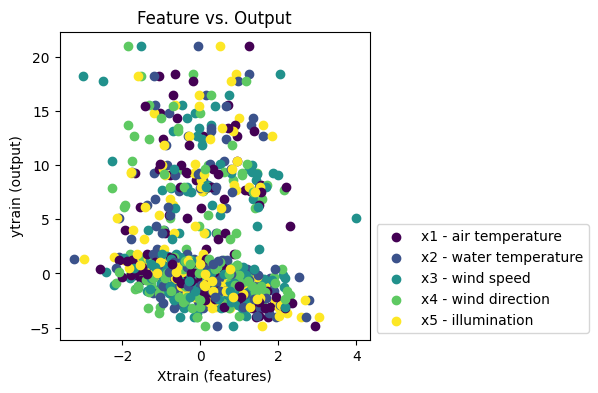

In [37]:
# normalize data:

#def Scaler(data, inverse=False):
    
#    u = np.mean(data)
#    s = np.std(data)

#    scaled_data = (data - u) / s

    # useful to scale back the model's output
#    if inverse:

#        scaled_data = data * s + u 

#    return scaled_data


#Xtrain_scaled = Scaler(Xtrain)
#ytrain_scaled = Scaler(ytrain)
#Xtest_scaled = Scaler(Xtest)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

num_colors = 5 # nr_colors = nr_features
gradient = np.linspace(0, 1, num_colors)
colormap = plt.colormaps['viridis']
colors = colormap(gradient)

plt.figure(figsize=(4,4))
plt.title('Feature vs. Output')
plt.xlabel('Xtrain (features)')
plt.ylabel('ytrain (output)')
labels = []

for s,sample in enumerate(X_train_scaled):
    for f, feature in enumerate(sample):
        plt.scatter(feature, y_train[s], color= colors[f])

labels.append('x1 - air temperature')
labels.append('x2 - water temperature')
labels.append('x3 - wind speed')
labels.append('x4 - wind direction')
labels.append('x5 - illumination')

plt.legend(labels[:num_colors], loc='lower left', bbox_to_anchor=(1,0))
plt.show()

#### Step 5 − Linear Regression Model


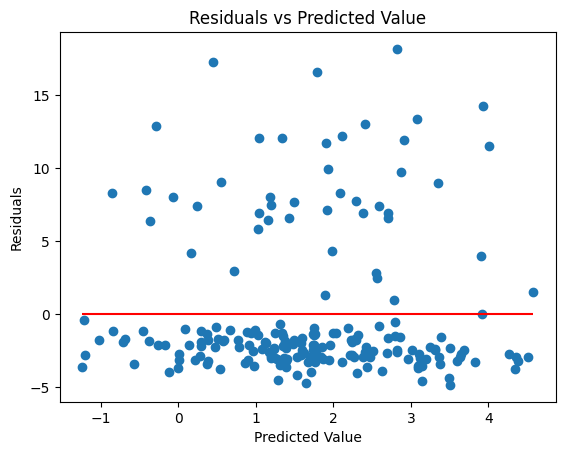

In [41]:
# models:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#difference bettween real and predicted values
residuals = y_train - y_pred

plt.scatter(y_pred, residuals)
plt.hlines(0, min(y_pred), max(y_pred), colors='r')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Value')
plt.show()




#### Step 6 − Outlier Removal


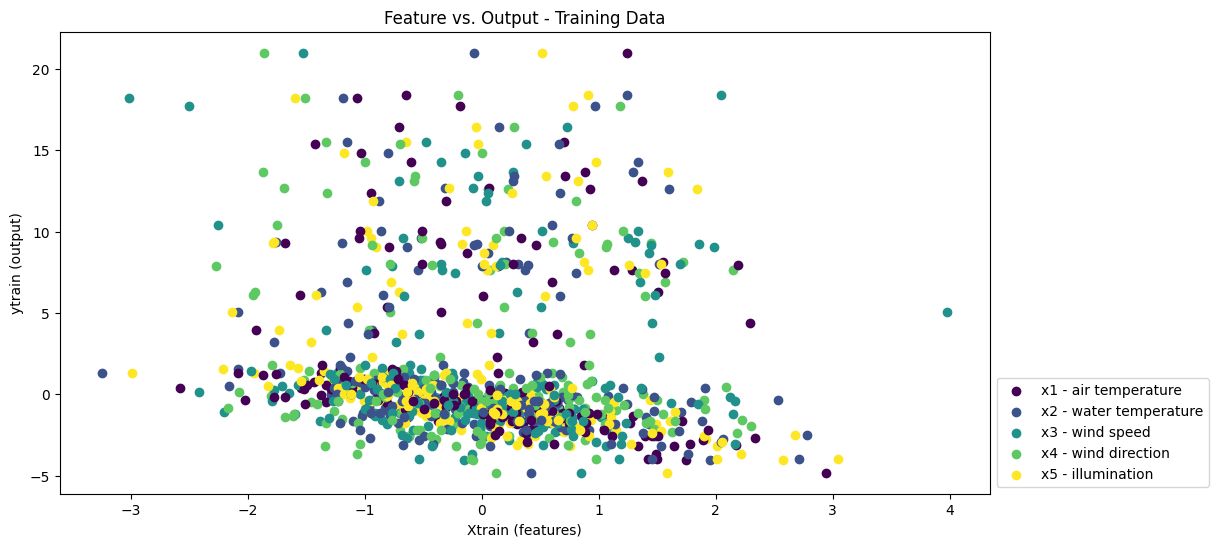

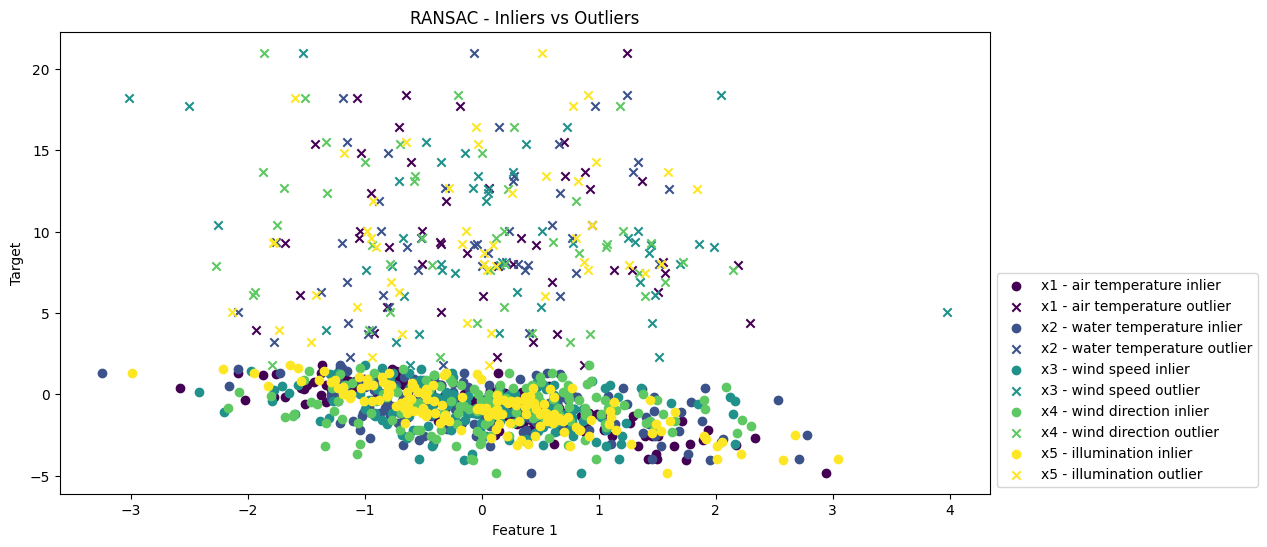

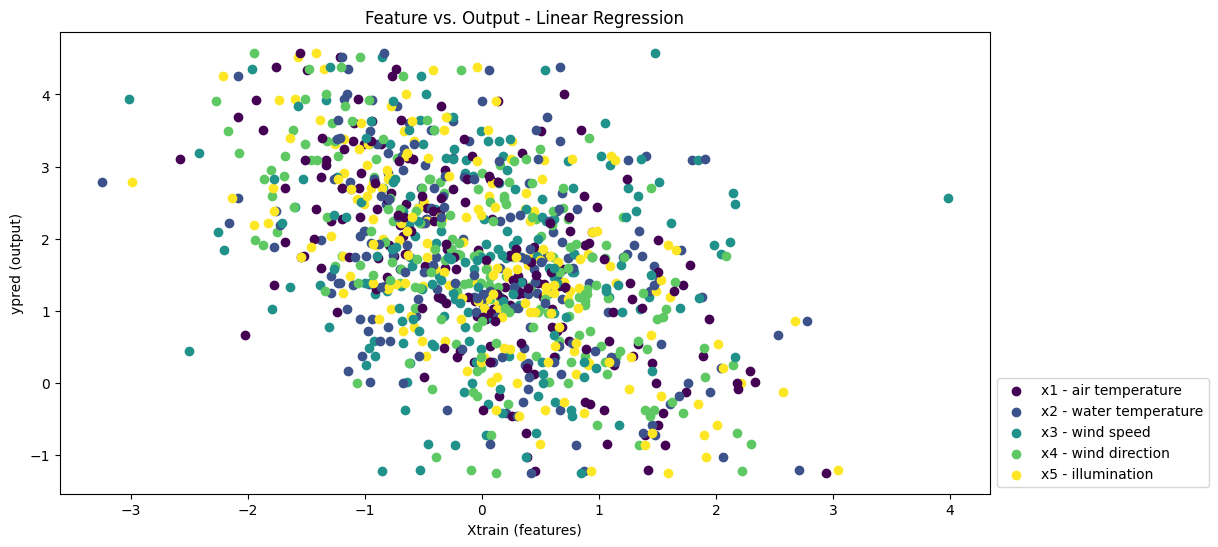

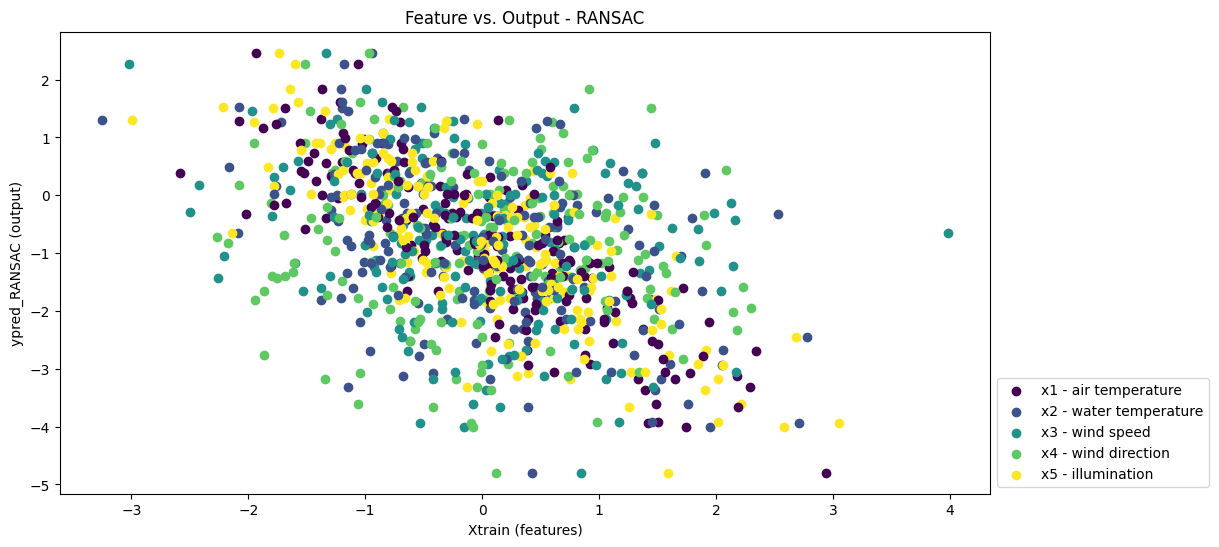

In [67]:
#Ransac Model
ransac = RANSACRegressor(estimator=LinearRegression())

#ransac to our data
ransac.fit(X_train, y_train)

y_pred_ransac = ransac.predict(X_test)

num_colors = 5 # nr_colors = nr_features
gradient = np.linspace(0, 1, num_colors)
colormap = plt.colormaps['viridis']
colors = colormap(gradient)

# Plot the results
plt.figure(figsize=(12, 6))
plt.title('Feature vs. Output - Training Data')
plt.xlabel('Xtrain (features)')
plt.ylabel('ytrain (output)')

labels = []

for s,sample in enumerate(X_train):
    for f, feature in enumerate(sample):
        plt.scatter(feature, y_train[s], color= colors[f])

labels.append('x1 - air temperature')
labels.append('x2 - water temperature')
labels.append('x3 - wind speed')
labels.append('x4 - wind direction')
labels.append('x5 - illumination')

plt.legend(labels[:num_colors], loc='lower left', bbox_to_anchor=(1,0))
plt.show()

plt.figure(figsize=(12,6))

plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('RANSAC - Inliers vs Outliers')

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
labels_outliers = []

# Plot inliers and outliers
for f, feature in enumerate(X_train.T):  # Transpose to iterate features
    plt.scatter(feature[inlier_mask], y_train[inlier_mask], color=colors[f], marker='o')
    plt.scatter(feature[outlier_mask], y_train[outlier_mask], color=colors[f], marker='x')

labels_outliers.append('x1 - air temperature inlier')
labels_outliers.append('x1 - air temperature outlier')
labels_outliers.append('x2 - water temperature inlier')
labels_outliers.append('x2 - water temperature outlier')
labels_outliers.append('x3 - wind speed inlier')
labels_outliers.append('x3 - wind speed outlier')
labels_outliers.append('x4 - wind direction inlier')
labels_outliers.append('x4 - wind direction outlier')
labels_outliers.append('x5 - illumination inlier')
labels_outliers.append('x5 - illumination outlier')


#plt.scatter(X_train[inlier_mask][:, 0], y_train[inlier_mask], color= colors[f], marker='o', label='Inliers')
#plt.scatter(X_train[outlier_mask][:, 0], y_train[outlier_mask], color='red', marker='x', label='Outliers')


plt.legend(labels_outliers[:10], loc='lower left', bbox_to_anchor=(1,0))
plt.show()

#Linear Regression

plt.figure(figsize=(12,6))
plt.title('Feature vs. Output - Linear Regression')
plt.xlabel('Xtrain (features)')
plt.ylabel('ypred (output)')

for s,sample in enumerate(X_train):
    for f, feature in enumerate(sample):
        plt.scatter(feature, y_pred[s], color= colors[f])



plt.legend(labels[:num_colors], loc='lower left', bbox_to_anchor=(1,0))
plt.show()

#RANSAC 

plt.figure(figsize=(12,6))
plt.title('Feature vs. Output - RANSAC')
plt.xlabel('Xtrain (features)')
plt.ylabel('ypred_RANSAC (output)')

for s,sample in enumerate(X_train):
    for f, feature in enumerate(sample):
        plt.scatter(feature, y_pred_ransac[s], color= colors[f])

#plt.plot(X_train, y_pred, color='blue', label='Linear Regression')
#plt.plot(X_train, y_pred_ransac, color='green', label='RANSAC')

#plt.xlabel('Feature')
#plt.ylabel('Target')
#plt.title('Comparison of Linear Regression and RANSAC on Training Data')
#plt.legend()
#plt.show()




plt.legend(labels[:num_colors], loc='lower left', bbox_to_anchor=(1,0))
plt.show()


In [14]:
# initial arbitrary set of parameters
# (can be adjusted if the best alpha is at the upper limit)
alphas_R = np.linspace(0,3,200)
alphas_L = np.linspace(0,1,200)

In [15]:
# store best alpha parameters:
best_alpha_R = np.zeros(len(cv_folds))
best_alpha_L = np.zeros(len(cv_folds))

In [16]:
# store negative mean squared error:
neg_mean_sqr_err_R = np.zeros(len(cv_folds), dtype=object)
neg_mean_sqr_err_L = np.zeros(len(cv_folds), dtype=object)

In [17]:
# do grid search cross valitadion 
# to find the best parameter for each model:

for i, cv in enumerate(cv_folds):

    # Ridge:
    ridge_gridsearch = GridSearchCV(Ridge, param_grid={'alpha': alphas_R}, scoring = 'neg_mean_squared_error', cv = cv)
    # with non-scaled data:
    #ridge_gridsearch.fit(Xtrain, ytrain)
    # with scaled data:
    ridge_gridsearch.fit(Xtrain_scaled, ytrain_scaled)
    
    # Lasso:
    lasso_gridsearch = GridSearchCV(Lasso, param_grid={'alpha': alphas_L}, scoring = 'neg_mean_squared_error', cv = cv)
    # with non-scaled data:
    #lasso_gridsearch.fit(Xtrain, ytrain)
    # with scaled data:
    lasso_gridsearch.fit(Xtrain_scaled, ytrain_scaled)
    
    # Best params:
    best_alpha_R[i] = ridge_gridsearch.best_params_['alpha']
    best_alpha_L[i] = lasso_gridsearch.best_params_['alpha']
    # Neg mean squared error:
    neg_mean_sqr_err_R[i] = ridge_gridsearch.cv_results_['mean_test_score']
    neg_mean_sqr_err_L[i] = lasso_gridsearch.cv_results_['mean_test_score']

/home/olivas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/olivas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/olivas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.830e+01, tolerance: 1.220e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  mod

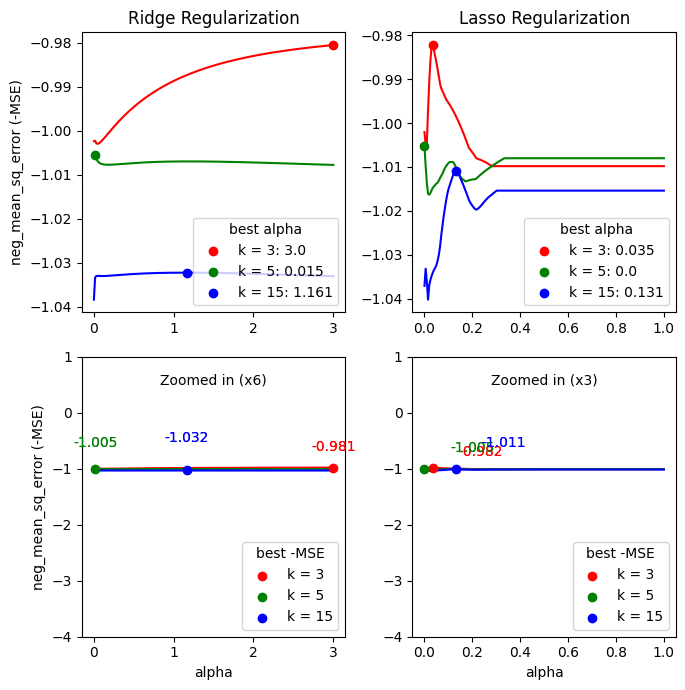

In [18]:
# plot the results:

colors = ['red', 'green', 'blue']

fig, axes = plt.subplots(2, 2, figsize=(7, 7))

axes[0,0].set_title('Ridge Regularization')
axes[0,1].set_title('Lasso Regularization')
axes[1,0].text(1.5, 0.5, 'Zoomed in (x6)', 
               fontsize=10, color='k', horizontalalignment='center')
axes[1,1].text(.5, 0.5, 'Zoomed in (x3)', 
               fontsize=10, color='k', horizontalalignment='center')

for ax in range(2):
    for i in range(len(cv_folds)): 

        # Ridge:
        # plot alpha vs. neg_mean_sqr_error
        axes[ax,0].plot(alphas_R, neg_mean_sqr_err_R[i], color=colors[i])
        # plot best alpha
        label = ['k = ' + str(cv_folds[i]) + ': '+str(np.round(best_alpha_R[i],3)), 
                 'k = ' + str(cv_folds[i])]
        axes[ax,0].scatter(best_alpha_R[i], np.max(neg_mean_sqr_err_R[i]), 
                           c=colors[i], zorder=10, label=label[ax])
        # plot neg_mean_sqr_error value
        axes[1,0].text(best_alpha_R[i], np.max(neg_mean_sqr_err_R[i])+0.3+0.1*i, 
                       str(np.round(np.max(neg_mean_sqr_err_R[i]),3)), 
                       fontsize=10, color=colors[i], horizontalalignment='center')
        
        # Lasso:
        # plot alpha vs. neg_mean_sqr_error
        axes[ax,1].plot(alphas_L, neg_mean_sqr_err_L[i], color=colors[i])
        # plot best alpha
        label=['k = ' + str(cv_folds[i]) + ': '+str(np.round(best_alpha_L[i],3)),
               'k = ' + str(cv_folds[i])]
        axes[ax,1].scatter(best_alpha_L[i], np.max(neg_mean_sqr_err_L[i]), 
                           c=colors[i], zorder=10, label=label[ax])
        # plot neg_mean_sqr_error value
        axes[1,1].text(best_alpha_L[i]+0.2, np.max(neg_mean_sqr_err_L[i])+0.2+0.1*i, 
                       str(np.round(np.max(neg_mean_sqr_err_L[i]),3)), 
                       fontsize=10, color=colors[i], horizontalalignment='center')  
        

axes[1,0].set_xlabel('alpha'); axes[1,1].set_xlabel('alpha')
axes[0,0].set_ylabel('neg_mean_sq_error (-MSE)') 
axes[1,0].set_ylabel('neg_mean_sq_error (-MSE)')
axes[1,0].set_ylim(-4,1); axes[1,1].set_ylim(-4,1)

legend = axes[0,0].legend(loc='lower right')
legend.set_title('best alpha')
legend = axes[0,1].legend(loc='lower right')
legend.set_title('best alpha')
legend = axes[1,0].legend(loc='lower right')
legend.set_title('best -MSE')
legend = axes[1,1].legend(loc='lower right')
legend.set_title('best -MSE')

plt.tight_layout()


In [228]:
print('Best model: Lasso')
print('Best cv fold number: k = 15')
print('Best -MSE: ', np.round(np.max([mse for i,mse in enumerate(neg_mean_sqr_err_L)]),3))
print('Best alpha: ', np.round(best_alpha_L[2],3)) 

Best model: Lasso
Best cv fold number: k = 15
Best -MSE:  -0.598
Best alpha:  0.04


#### Step 6 − Train the best model using the fit() method

In [19]:
# create the best model (with alpha = best alpha):
best_Lasso = linear_model.Lasso(alpha=best_alpha_L[2])
# train the best model with the trainning data:
best_Lasso.fit(Xtrain_scaled, ytrain_scaled)

Lasso(alpha=0.1306532663316583)

#### Step 7 − Predict the output for the testing data

In [20]:
# predict the output (ytest_pred) from the new dataset Xtest:
ytest_pred_scaled = best_Lasso.predict(Xtest_scaled).reshape(len(Xtest_scaled),1)
ytest_pred_scaled.shape

(200, 1)

In [21]:
# re-scale the predicted data back:
ytest_pred = Scaler(ytest_pred_scaled, inverse=True)
ytest_pred.shape

(200, 1)

In [232]:
# save ypred_test as .txt file:
np.save('ytest_pred', ytest_pred)